In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y, random_state = 42)
# del X_train,X_test


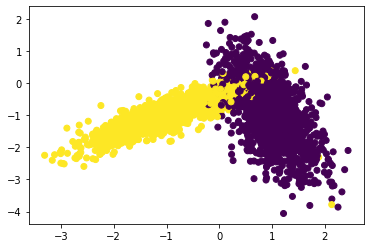

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
a = 1
b = 50
param_range = (a, b)
def params_generator(parameter_range):
    if a < b:
        param = sorted(np.random.randint(parameter_range[0], parameter_range[1], 10))
        return param
    else:
        print('a = {} is not less than b = {} please enter values where a should be less than b '.format(a, b)) 
params = params_generator(param_range)   

#Printing the value of Hyper-parameter
params

[2, 8, 8, 9, 13, 23, 25, 37, 37, 44]

In [4]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores = []
    for k in param_range:
        trainscores_folds = []
        testscores_folds  = []
        for j in range(folds-1,-1, -1):
            
        #2.devide numbers ranging from  0 to len(X_train) into groups= folds
            groups_X_train = np.split(x_train, folds)
            groups_Y_train = np.split(y_train, folds)
            X_Test = groups_X_train[j]
            Y_Test = groups_Y_train[j]
            groups_X_train.pop(j)
            groups_Y_train.pop(j)
            X_Train = np.concatenate(groups_X_train)
            Y_Train = np.concatenate(groups_Y_train)
            classifier.n_neighbors = k
            classifier.fit(X_Train,Y_Train)
        
            Y_predicted = classifier.predict(X_Test)
            testscores_folds.append(accuracy_score(Y_Test, Y_predicted))
            
            Y_predicted = classifier.predict(X_Train)
            trainscores_folds.append(accuracy_score(Y_Train, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores  
                
               


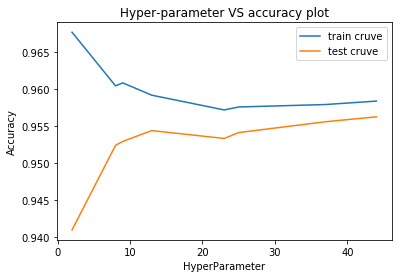

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
folds = 3

train_scores,cv_scores = RandomSearchCV(X_train, Y_train, neigh, params, folds)

plt.plot(params,train_scores, label='train cruve')
plt.plot(params,cv_scores, label='test cruve')
plt.xlabel('HyperParameter')
plt.ylabel('Accuracy')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [24]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold, label = y)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature-1')
    plt.ylabel('Feature-2')
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

In [26]:
#Finding the correct hyper parameter
for i in range(0,len(train_scores)):
    print(train_scores[i]-cv_scores[i])#checking the minimal difference between accuracy of train and cv scores    

0.010066666666666557
0.007933333333333348
0.0048000000000000265
0.0031333333333334323
0.0029333333333332323
0.003466666666666507
0.002866666666666573
0.0021333333333334314
0.0019999999999998908
0.0018000000000000238


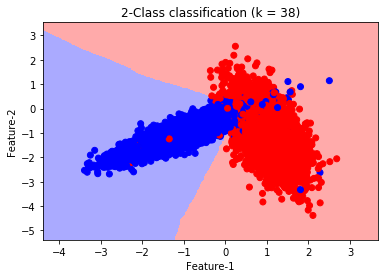

In [31]:
#As we can see that the accuracy score for hyper-parameter 46 is minimal so we will take 46 as n_neighbors
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 38)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)